# Project: Investigate a Dataset of tmdb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data and print out a few lines.
movies_df = pd.read_csv("tmdb-movies.csv")
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# number of columns in dataset
movies_df.shape

(10866, 21)

In [4]:
# some info of columns in dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# description of the dataset
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# duplicate rows in the dataset
movies_df.duplicated().sum()

1

In [7]:
# features with missing values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# what those unique values are and counts
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# datatypes of columns
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55c2a25048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f55c2be9080>]], dtype=object)

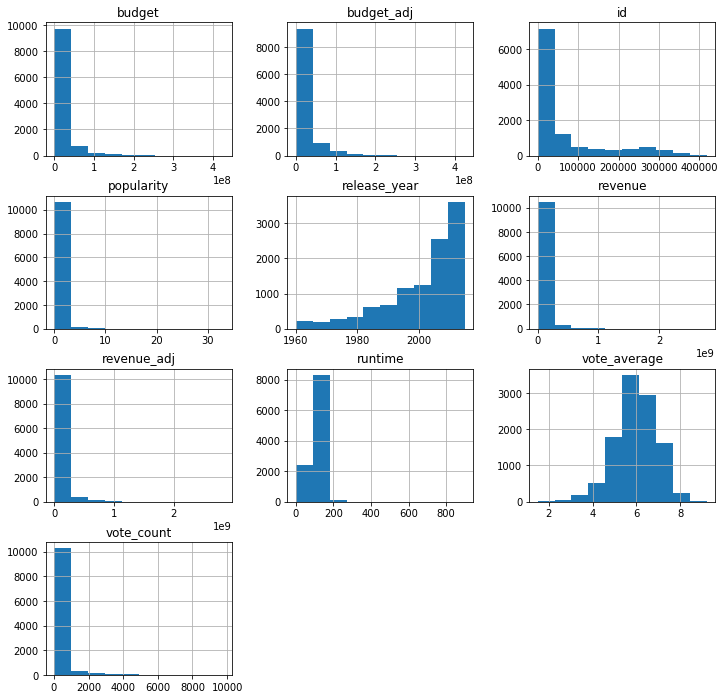

In [10]:
movies_df.hist(figsize=(12,12))

### Data Cleaning

In [11]:
# drop unnecessary columns from the dataset 
movies_df.drop(columns= ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], inplace= True)
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [12]:
movies_df.shape

(10866, 12)

In [13]:
# drop rows with any null values in the dataset
movies_df.dropna(inplace= True)
movies_df.shape

(10732, 12)

In [14]:
# checks if any of columns in the dataset have null values - should print False
movies_df.isnull().sum().any()

False

In [15]:
# drop duplicates in the dataset
movies_df.drop_duplicates(inplace= True)
movies_df.shape

(10731, 12)

In [16]:
# print number of duplicates again to confirm dedupe - should be 0
movies_df.duplicated().sum()

0

In [17]:
# notice that's values in runtime column has 0s values, so fill it with mode  
runtime_mode = int(np.ceil(movies_df['runtime'].mode()))

# check if runtime has 0 value put the mode else put the same value
movies_df['runtime'] = np.where(movies_df['runtime'] == 0, runtime_mode, movies_df['runtime'])

# check if there are 0 values runtime column
movies_df[movies_df['runtime'] == 0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year


In [18]:
# Made levels of popularity
movies_df['popularity'].describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

In [19]:
bins_edges = [0.000065, 0.383856, 0.776408, 32.985763]
bins_labels = ['low', 'medium', 'high']
movies_df['popularity_levels'] = pd.cut(movies_df['popularity'], bins_edges, labels= bins_labels)
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,popularity_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,high


In [20]:
# Made levels of runtime of movies 
movies_df['runtime'].describe()

count    10731.000000
mean       102.703662
std         30.047086
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [21]:
bins_edges = [15, 90, 120, 338]
bins_labels = ['short', 'medium', 'long']
movies_df['runtime_levels'] = pd.cut(movies_df['runtime'], bins_edges, labels= bins_labels)
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,popularity_levels,runtime_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,high,long
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,high,medium
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,high,medium
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,high,long
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,high,long


In [22]:
movies_df['revenue'].describe()

count    1.073100e+04
mean     4.031989e+07
std      1.176524e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [23]:
# drop the values of zeros in revenue and budget 
movies_df = movies_df.drop(movies_df[(movies_df.revenue == 0) | (movies_df.budget == 0)].index)
movies_df.shape

(3849, 14)

In [24]:
movies_df[(movies_df.revenue == 0) | (movies_df.budget == 0)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,popularity_levels,runtime_levels


In [25]:
# made a new column profit 
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

In [26]:
# split the rows that have more than one director
# First, let's get all the rows that have more than one director
movies_with_more_dir = movies_df[movies_df['director'].str.contains('|', regex = False, na = False)]
movies_with_more_dir.shape

(242, 15)

In [27]:
# create copies of the movies that's with more dir dataframe, movies_with_more_dir
movies_with_more_dir_copy1 = movies_with_more_dir.copy()
movies_with_more_dir_copy2 = movies_with_more_dir.copy()

In [28]:
# apply split function to each column of each dataframe copy
movies_with_more_dir_copy1['director'] = movies_with_more_dir_copy1['director'].apply(lambda x: x.split('|')[0])
movies_with_more_dir_copy2['director'] = movies_with_more_dir_copy2['director'].apply(lambda x: x.split('|')[1])

In [29]:
# append the two dataframes
new_rows = movies_with_more_dir_copy1.append(movies_with_more_dir_copy2)

# drop each row from the original movies_df dataframe
# do this by using pandas' drop function with movies_df's index
movies_df.drop(movies_with_more_dir.index, inplace=True)

# append new_rows to df_18
movies_df = movies_df.append(new_rows)

<a id='eda'></a>
## Exploratory Data Analysis


### If the budget is high, will the return be too much?

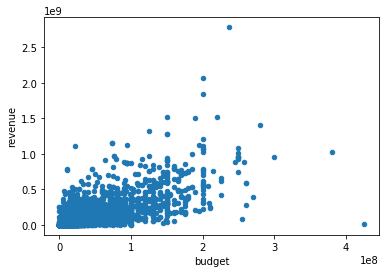

In [30]:
# If the budget is high, will the return be too much?
# Describe the correlation between budget and revenue.
movies_df.plot(x= 'budget', y='revenue', kind='scatter')

### What is the mean Revenue, budget and profit of each year?

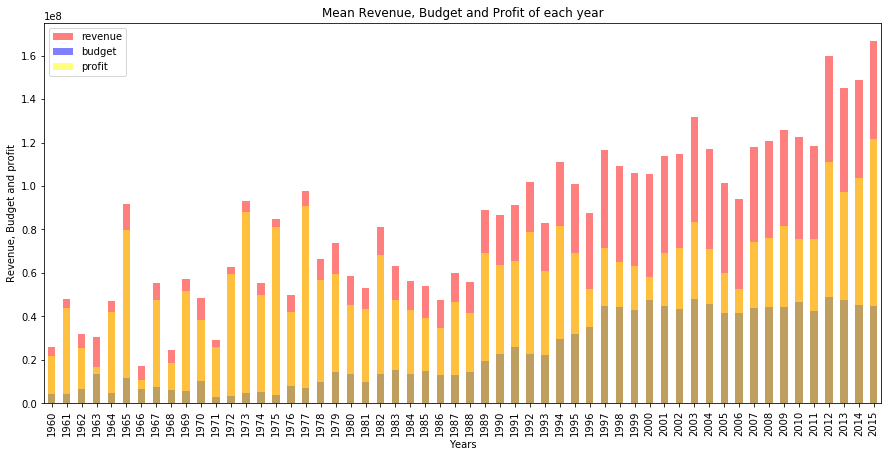

In [31]:
# what is the mean Revenue, budget and profit of each year?
movies_df.groupby(['release_year']).revenue.mean().plot(kind='bar', alpha=0.5, color='red',figsize=(15,7)), 
movies_df.groupby(['release_year']).budget.mean().plot(kind='bar', alpha=0.5, color='blue',figsize=(15,7)),
movies_df.groupby(['release_year']).profit.mean().plot(kind='bar', alpha=0.5, color='yellow',figsize=(15,7))
plt.legend()
plt.title('Mean Revenue, Budget and Profit of each year')
plt.xlabel('Years')
plt.ylabel('Revenue, Budget and profit');

### What is the popular type of movies (long, Medium or short)?

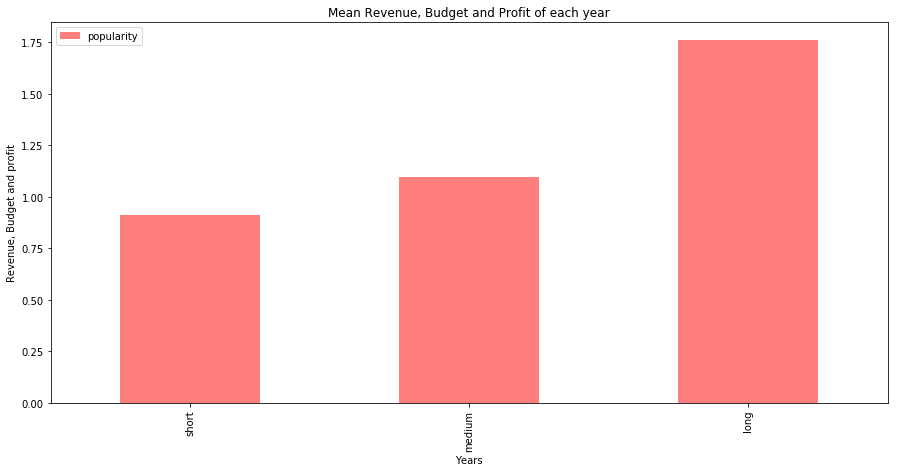

In [32]:
# The popular type of movies (long, Medium or short)
movies_df.groupby(['runtime_levels']).popularity.mean().plot(kind='bar', alpha=0.5, color='red',figsize=(15,7)), 
plt.legend()
plt.title('Mean Revenue, Budget and Profit of each year')
plt.xlabel('Years')
plt.ylabel('Revenue, Budget and profit');

### What is the most 5 genres popular?

In [33]:
# Split the genres of each colums and put them in a dataframe
genres_df = movies_df['genres'].str.split("|", expand=True)
genres_df = genres_df.set_index(movies_df['release_year'])
# Verifying successful separation 
genres_df.head()

,0,1,2,3,4
release_year,,,,,
2015,Action,Adventure,Science Fiction,Thriller,None
2015,Action,Adventure,Science Fiction,Thriller,None
2015,Adventure,Science Fiction,Thriller,None,None
2015,Action,Adventure,Science Fiction,Fantasy,None
2015,Action,Crime,Thriller,None,None


In [34]:
#Renaming the genres column and verifying the genres value count
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              913
Comedy             828
Action             723
Adventure          342
Horror             286
Crime              175
Thriller           163
Animation          149
Fantasy            121
Science Fiction    105
Romance             72
Family              53
Documentary         36
Mystery             36
Music               31
War                 20
Western             19
History             18
TV Movie             1
Name: genres_adj, dtype: int64

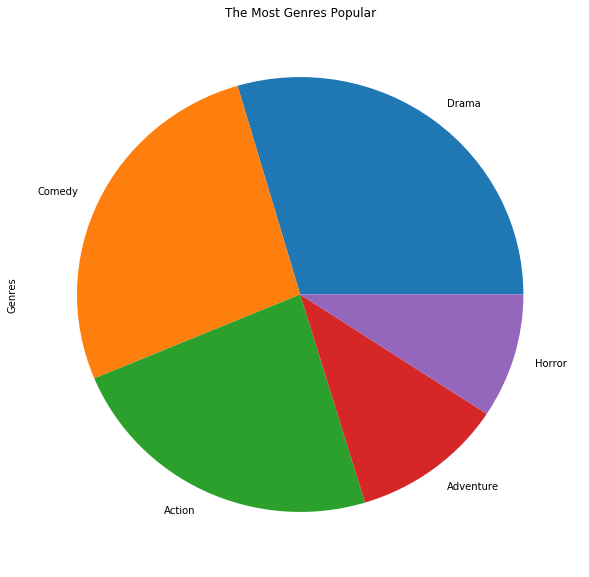

In [35]:
genres_df.genres_adj.value_counts().head().plot(kind='pie', figsize=(10,10))
plt.title('The Most Genres Popular')
plt.ylabel('Genres');

In [36]:
genres_df.genres_adj.groupby(['release_year']).value_counts()

release_year  genres_adj     
1960          Action              2
              Comedy              2
              Drama               1
1961          Comedy              3
              Action              2
              Adventure           2
              Drama               2
              Music               2
              Horror              1
              Western             1
1962          Western             3
              Adventure           2
              Drama               2
              Crime               1
1963          Action              3
              Drama               2
              Adventure           1
              Comedy              1
              Horror              1
1964          Drama               3
              Comedy              2
              Adventure           1
              Crime               1
1965          Drama               3
              Action              1
              Adventure           1
1966          Action              

### What is the most movie has max revenue?

In [37]:
# The Most movie that's has max revenue
idx = movies_df.revenue.idxmax()
movies_df.original_title.loc[idx]

'Avatar'

### What is the most movie has high popularity?

In [38]:
# The Most movie that's has high popularity
idx = movies_df.popularity.idxmax()
movies_df.original_title.loc[idx]

'Jurassic World'

### What is the most movie has high vote count?

In [39]:
# The Most movie that's has max vote count
idx = movies_df.vote_count.idxmax()
movies_df.original_title.loc[idx]

'Inception'

### What is the most movie has high vote average?

In [40]:
# The Most movie that's has max vote average
idx = movies_df.vote_average.idxmax()
movies_df.original_title.loc[idx]

'The Shawshank Redemption'

<a id='conclusions'></a>
## Conclusions

- Let's say that there is a positive corroletion butween the revenue and budget.
- The 2015 Year is the most year has high revenue.
- The 2015 Year is the most year has high profit.
- The 2000 and 2012 Years are the most years has high budget.
- The popular type of movies is long movies.
- The most 5 genres popular is Drama, Comedy, Action, Adventure and Horror.
- The Most movie that's has high revenue is Avatar
- The Most movie that's has high popularity is Jurassic World
- The Most movie that's has high vote count is Inception
- The Most movie that's has high vote average is The Shawshank Redemption

#### Limitions

- There is a lot of zeros values in revenue and budget, dropped them.
- There is a lot of none values in production_companies, dropped it.
- There is a lot of zeros values in runtime, filled it with mode value.


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0